# Linear Regression with Confidence Intervals
- adopted from https://rowannicholls.github.io/python/curve_fitting/linear_regression.html

In [3]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [4]:
x = np.array([0.21, 0.19, 0.22, 0.06, 0.31, 0.27, 0.3, 0.13, 0.1, 0.2, 0.35, 0.15, 0.27, 0.06, 0.18, 0.22, 0.23, 0.22, 0.08, 0.25, 0.27, 0.16, 0.25, 0.07, 0.25, 0.26, 0.12, 0.41, 0.01, 0.2, 0.22, 0.23, 0.23, 0.1, 0.23, 0.29, 0.15, 0.35, 0.07, 0.14, 0.25, 0.16, 0.27, 0.08, 0.24, 0.2, 0.29, 0.24, 0.06, 0.21, 0.27, 0.19, 0.23, 0.08, 0.23, 0.22, 0.25, 0.21, 0.08, 0.24, 0.19, 0.21, 0.19, 0.14, 0.27, 0.26, 0.23, 0.15, 0.07, 0.29, 0.28, 0.33, 0.17, 0.06, 0.16, 0.35, 0.15, 0.32, 0.04, 0.13, 0.19, 0.28, 0.2, 0.07, 0.26, 0.2, 0.24, 0.18, 0.05, 0.32, 0.22, 0.26, 0.26, 0.06, 0.2, 0.28, 0.26, 0.17, 0.08, 0.22, 0.17, 0.45, 0.15, 0.07, 0.17, 0.28, 0.34, 0.17, 0.05, 0.16, 0.28, 0.19, 0.31, 0.09, 0.14, 0.27, 0.18, 0.26, 0.13, 0.17, 0.17, 0.29, 0.21, 0.06, 0.27, 0.45, 0.05, 0.34, 0.06, 0.1, 0.31, 0.21, 0.22, 0.07, 0.19, 0.22, 0.26, 0.19, 0.09, 0.24, 0.35, 0.1, 0.3, 0.06, 0.18, 0.21, 0.22, 0.17, 0.07, 0.33, 0.23, 0.28, 0.18, 0.09, 0.22, 0.18, 0.3, 0.16, 0.08, 0.28])
y = np.array([0.23, 0.16, 0.23, 0.09, 0.29, 0.3, 0.29, 0.21, 0.06, 0.14, 0.51, 0.05, 0.31, 0.0, 0.13, 0.2, 0.2, 0.23, 0.09, 0.28, 0.29, 0.15, 0.26, 0.08, 0.22, 0.29, 0.07, 0.49, 0.01, 0.14, 0.23, 0.17, 0.28, 0.11, 0.21, 0.26, 0.1, 0.41, 0.09, 0.14, 0.31, 0.13, 0.22, 0.1, 0.24, 0.29, 0.26, 0.23, 0.05, 0.17, 0.26, 0.11, 0.25, 0.07, 0.31, 0.26, 0.22, 0.23, 0.09, 0.19, 0.2, 0.25, 0.19, 0.1, 0.26, 0.28, 0.22, 0.14, 0.1, 0.26, 0.39, 0.28, 0.14, 0.07, 0.12, 0.27, 0.14, 0.29, 0.08, 0.22, 0.23, 0.25, 0.19, 0.06, 0.27, 0.14, 0.31, 0.17, 0.0, 0.38, 0.22, 0.26, 0.28, 0.06, 0.18, 0.33, 0.24, 0.13, 0.09, 0.21, 0.19, 0.44, 0.13, 0.03, 0.21, 0.32, 0.33, 0.15, 0.04, 0.16, 0.28, 0.14, 0.33, 0.1, 0.15, 0.24, 0.1, 0.23, 0.19, 0.24, 0.15, 0.36, 0.16, 0.04, 0.29, 0.41, 0.02, 0.35, 0.11, 0.11, 0.2, 0.24, 0.15, 0.11, 0.29, 0.18, 0.25, 0.19, 0.12, 0.26, 0.39, 0.08, 0.38, 0.05, 0.1, 0.21, 0.19, 0.16, 0.11, 0.33, 0.31, 0.4, 0.11, 0.12, 0.06, 0.26, 0.2, 0.26, 0.09, 0.19])

The fitted straight line has equation y = 1.0x -  0.0
R² = 0.78


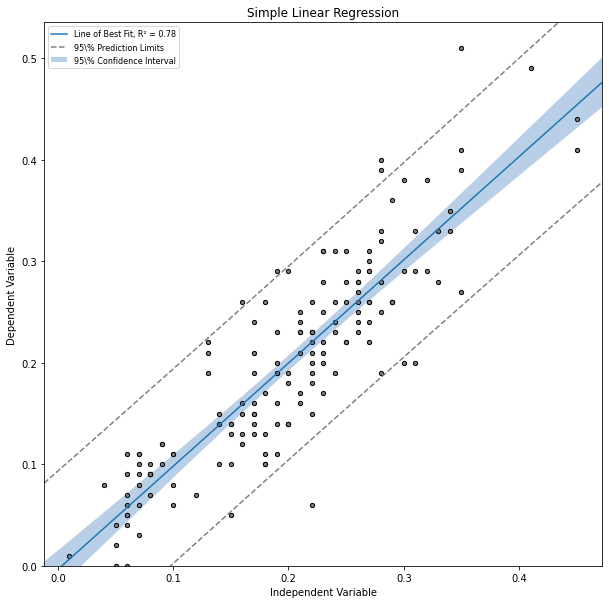

In [6]:
plt.figure(figsize=(10, 10))

# Degree of the fitting polynomial
deg = 1
# Parameters from the fit of the polynomial
p = np.polyfit(x, y, deg)
m = p[0]  # Gradient
c = p[1]  # y-intercept

print(f'The fitted straight line has equation y = {m:.1f}x {c:=+6.1f}')

# Number of observations
n = y.size
# Number of parameters: equal to the degree of the fitted polynomial (ie the
# number of coefficients) plus 1 (ie the number of constants)
m = p.size
# Degrees of freedom (number of observations - number of parameters)
dof = n - m
# Significance level
alpha = 0.05
# We're using a two-sided test
tails = 2
# The percent-point function (aka the quantile function) of the t-distribution
# gives you the critical t-value that must be met in order to get significance
t_critical = stats.t.ppf(1 - (alpha / tails), dof)

# Model the data using the parameters of the fitted straight line
y_model = np.polyval(p, x)

# Create the linear (1 degree polynomial) model
model = np.poly1d(p)
# Fit the model
y_model = model(x)

# Mean
y_bar = np.mean(y)
# Coefficient of determination, R²
R2 = np.sum((y_model - y_bar)**2) / np.sum((y - y_bar)**2)

print(f'R² = {R2:.2f}')

# Calculate the residuals (the error in the data, according to the model)
resid = y - y_model
# Chi-squared (estimates the error in data)
chi2 = sum((resid / y_model)**2)
# Reduced chi-squared (measures the goodness-of-fit)
chi2_red = chi2 / dof
# Standard deviation of the error
std_err = np.sqrt(sum(resid**2) / dof)

# Create plot
plt.scatter(x, y, c='gray', marker='o', edgecolors='k', s=18)
xlim = plt.xlim()
ylim = plt.ylim()
# Line of best fit
plt.plot(np.array(xlim), p[1] + p[0] * np.array(xlim), label=f'Line of Best Fit, R² = {R2:.2f}')
# Fit
x_fitted = np.linspace(xlim[0], xlim[1], 100)
y_fitted = np.polyval(p, x_fitted)
# Confidence interval
ci = t_critical * std_err * np.sqrt(1 / n + (x_fitted - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
plt.fill_between(
    x_fitted, y_fitted + ci, y_fitted - ci, facecolor='#b9cfe7', zorder=0,
    label=r'95\% Confidence Interval'
)
# Prediction Interval
pi = t_critical * std_err * np.sqrt(1 + 1 / n + (x_fitted - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
plt.plot(x_fitted, y_fitted - pi, '--', color='0.5', label=r'95\% Prediction Limits')
plt.plot(x_fitted, y_fitted + pi, '--', color='0.5')
# Title and labels
plt.title('Simple Linear Regression')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
# Finished
plt.legend(fontsize=8)
plt.xlim(xlim)
plt.ylim(0, ylim[1])

plt.show()